# Recap

We will go through the main issues you will face when working with Recurrent Neural Networks that are designed to deal with time-series

# Part 1: How to make a proper Time Series Split ?

### First, split your time series into different SEQUENCES of (observations, target)

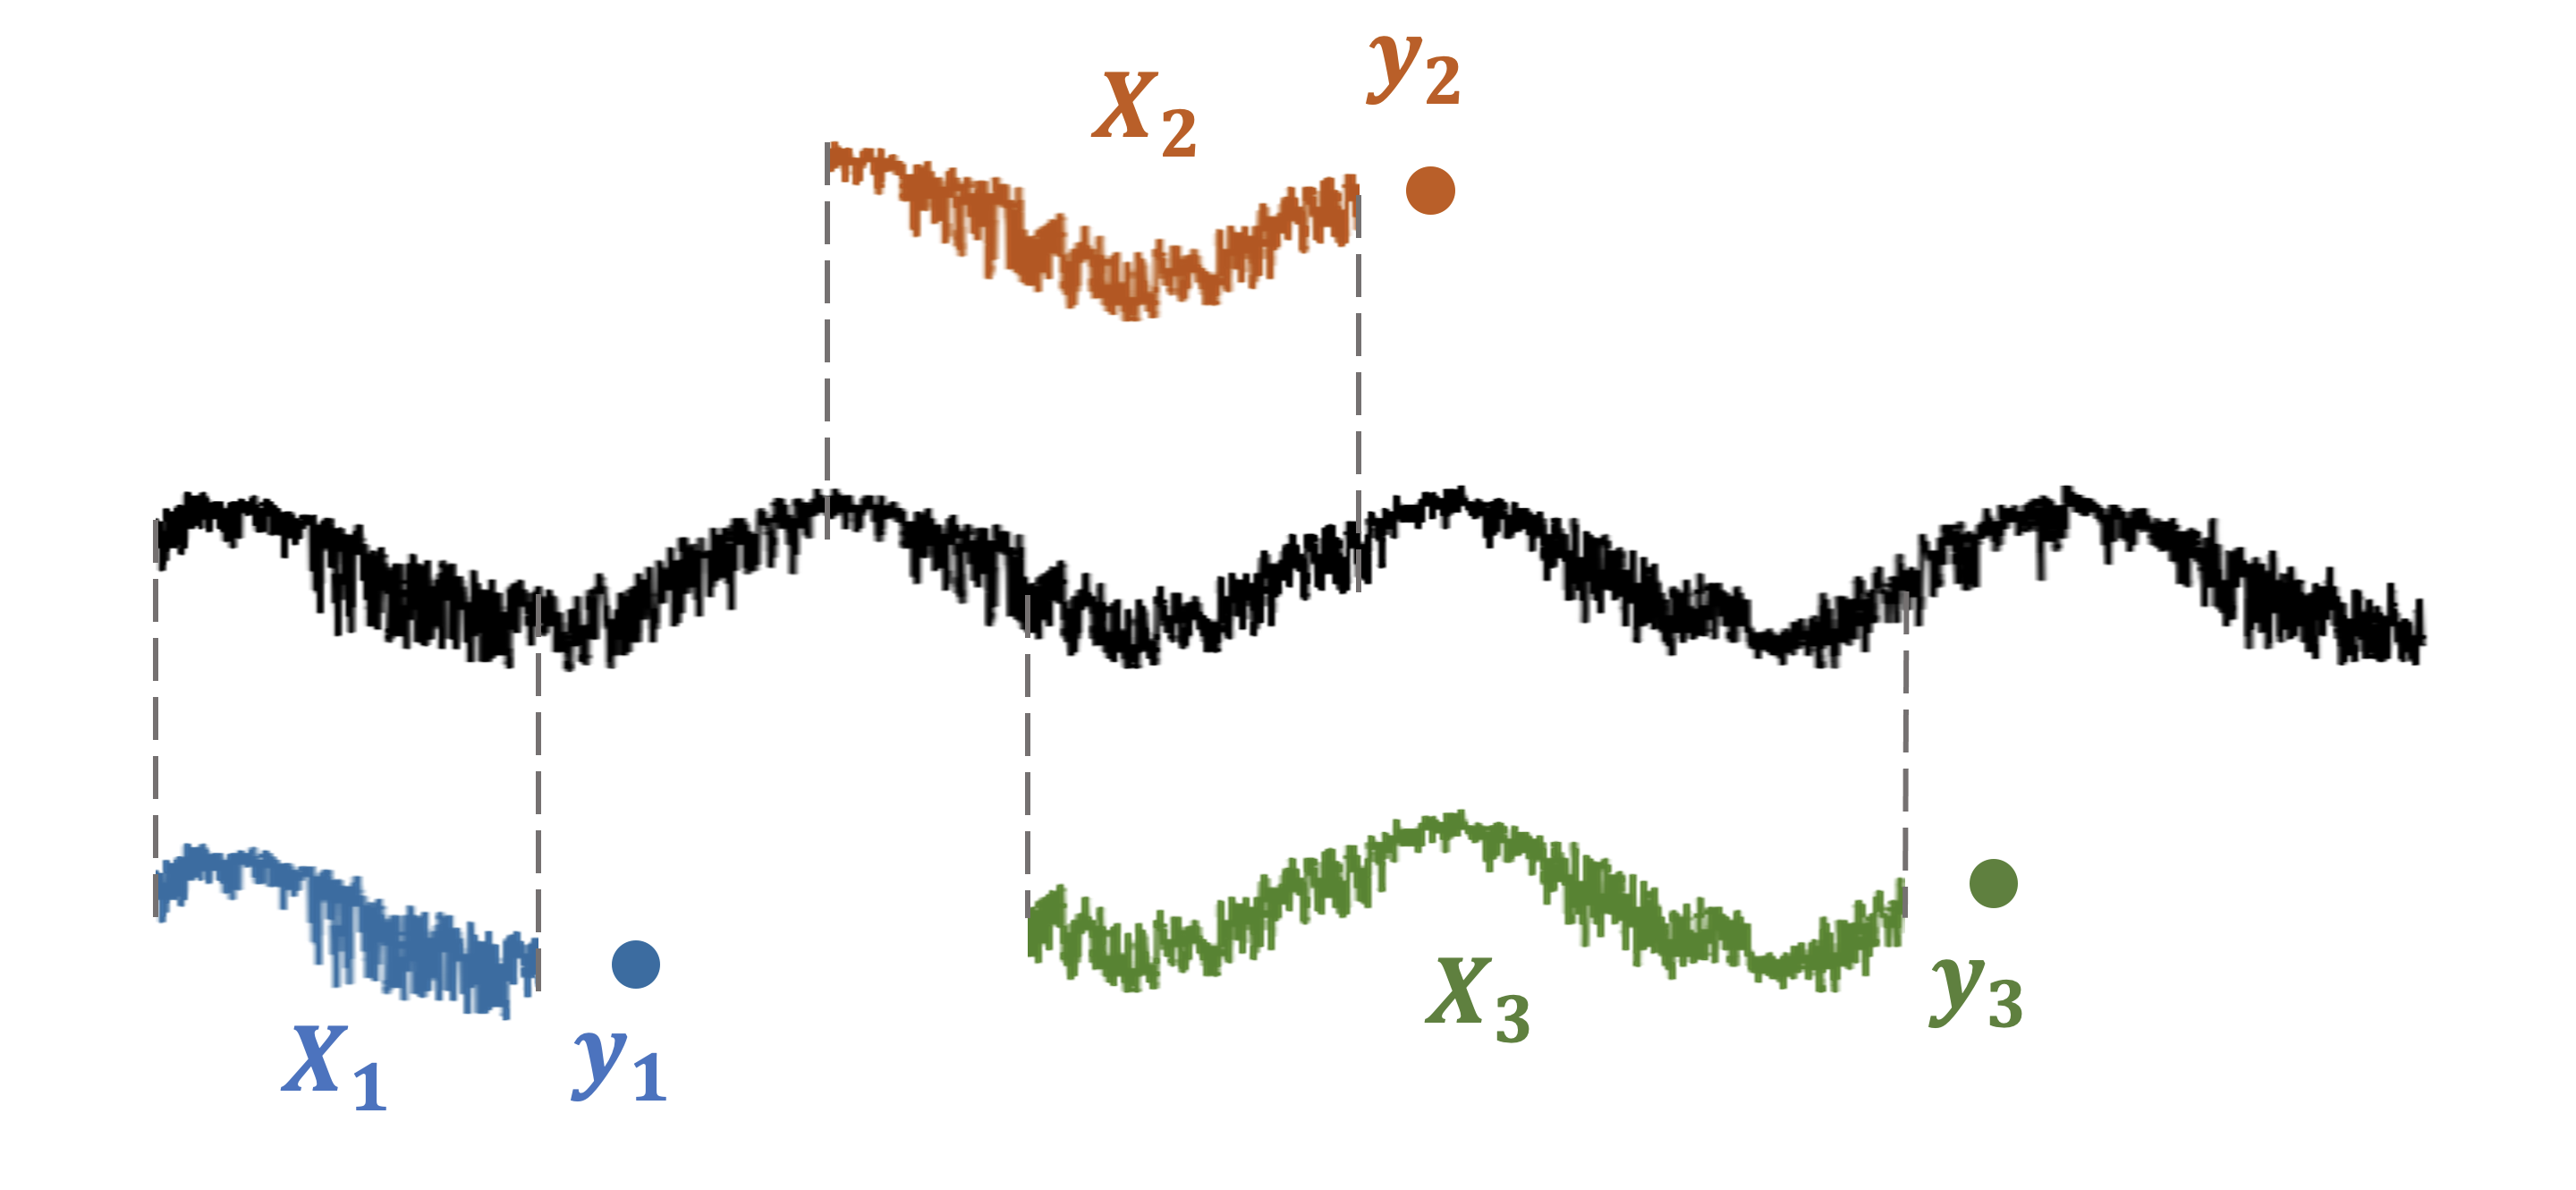

### ❓ How to avoid data leakage?

Always split your training set *chronologically before* your test set

👇 e.g. 4-time cross validation split

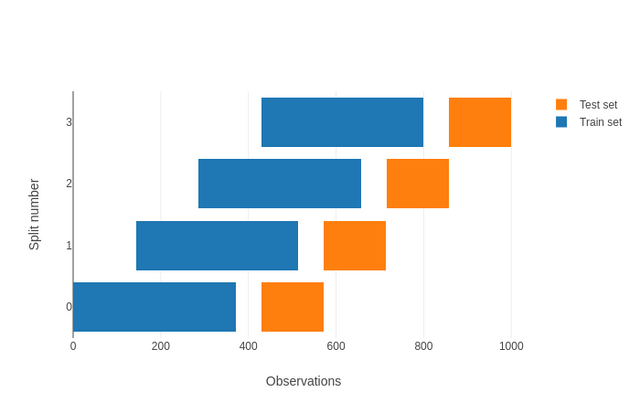

### ❓ Why do we need a "gap" between each train & test split ?

👇 Below is a zoom inside **one** single split

A gap of size `horizon - 1` is mandatory to reflect real situations:
- Here the forecast horizon is `4` days
- Let's say we want our train set to end by predicting day `10` based on days before `4, 5, 6`
- In a real situation we would need to **wait** for day `10` to discover the true value of `y` on which to finalize training
- Therefore, the test set can only start on day `10`, which is meant to predict `y_test = 10 + 4`

<span style='color:#2F8C41;font-size:20px'>horizon $h = 4$</span>

$$ \Large X^{t+\color{green}4} = f(X^t, X^{t-1}, X^{t-2}) $$

![](img/time_series_split.png)

✅ Use [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) `TimeSeriesSplit(n_splits = ..., gap=...)`

# Part 2: Air Pollution Solution

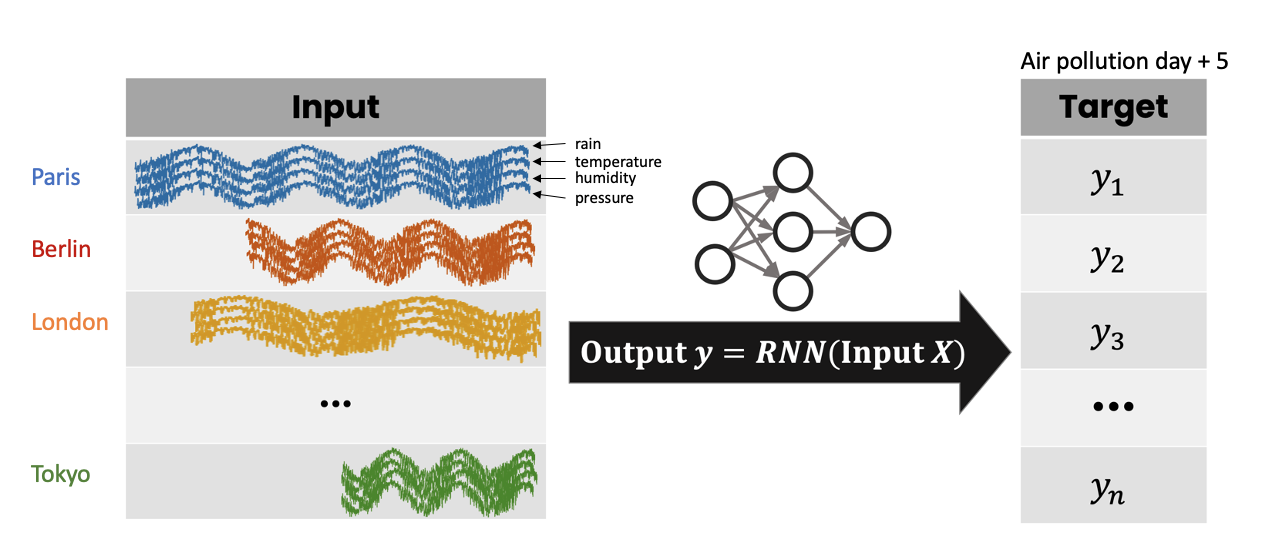

## 2.1 Data

❓ **Question** ❓ We will load the data from the third and fourth exercise. Load the data, and keep only the following columns :  `['pm2.5', 'TEMP', 'DEWP', 'PRES', 'Ir', 'Is', 'Iws']`

In [0]:
import pandas as pd

df = pd.read_csv('data.txt', index_col=[0])
df = df[['pm2.5', 'TEMP', 'DEWP', 'PRES', 'Ir', 'Is', 'Iws']]

In [0]:
df

❓ **Question** ❓ For the sake of simplicity, fill in the missing values with mean over the entire dataset.

In [0]:
df = df.fillna(df.mean())

Usually, in classic settings, there is multiple independent sequences $X$, each with a corresponding $y$.
However, if often happens that we don't have access to multiple sequences $X$, but to only one very long sequence as it is the case here. From that, experts usually split them into multiple sub-sequences.


❓ **Question** ❓ Write a function that is able to get a subsequence $X$ and a corresponding $y$ which corresponds to the air pollution **5 days** after the last observation. The length of the subsequence should be an argument of the function

In [0]:
import numpy as np

def subsample_sequence(df, length):
    pass  # YOUR CODE HERE
    return X, y

subsample_sequence(df, 10)

❓ **Question** ❓ Given a list of integers, write a function that split the initial dataset as many times as there are integers in the list. The length of each sequence is the value of the integer in that list.

In [0]:
def get_X_y(df, length_of_observations):
    X, y = [], []
    pass  # YOUR CODE HERE
    return X, y

length_of_observations = np.random.randint(10, 15, 100)
X, y = get_X_y(df, length_of_observations)

❓ **Question** ❓ If you split into a train and test set _after_ creating the shorter sequences, you risk having same values in the train and test set, which corresponds to data leakage. Therefore, split your train and test set and then, get your training and test sequences - and the corresponding output.

❗️ Beware of the gap required between train and test!

In [0]:
horizon = ...

df_train = ...
df_test = ...

In [0]:
length_of_observations = np.random.randint(10, 15, 100)
X_train, y_train = get_X_y(df, length_of_observations)

length_of_observations = np.random.randint(10, 15, 100)
X_test, y_test = get_X_y(df, length_of_observations)

Each sequence has a certain number of observations. But across sequences, this number of observations is not the same. Because the Neural Network is trained with *batches* of data, you must ensure that, once the sequences are concatenated, they can be represented as a tensor. This operation is called the padding

❓ From the four sequences above, return a padded tensor (with the dedicated Keras function) and plot it.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pass  # YOUR CODE HERE

X_train_pad.shape

## Model

As you added data to your input just for computational reasons, your model has to know which one is useful or not. 

❓ Initialize a model and add a masking layer so that your model does not take the padded values into account. You have to tell which value you used for the padding

In [0]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers.experimental.preprocessing import Normalization

In [0]:
# YOUR CODE HERE

❓ Compile your model

In [0]:
# YOUR CODE HERE

❓ Train your model on the data

In [0]:
# YOUR CODE HERE